<a href="https://colab.research.google.com/github/LucasRehmann/TPRedNeuronal/blob/main/TP_Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LIBRERÍAS Y PREPROCESSING

In [ ]:
!pip install keras-visualizer

from keras_visualizer import visualizer
import tensorflow as tf
import tensorflow_datasets as tfds
import math
import cv2
import numpy as np
from google.colab import files
from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

#Descargar el dataset de Tensorflow (MNIST), el as_supervised es para que tenga 
#una estructura de 2 tuples (input, label). El with_info permite devolver la
#info asociada con el builder
data, metadata = tfds.load('mnist', as_supervised=True, with_info=True)

#Separar los datos en dos variables, una con los datos para el entrenamiento,
#y otro para el de testeo
data_train, data_test = data['train'], data['test']

#Funcion para normalizar los datos, pasando los valores de los pixeles de
#0 - 225 a 0 - 1, haciendo que la red pueda aprender de mejor forma y mas rapido
def normalize(images, tags):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, tags

#Utilizar la funcion para normalizar los datos con los datos de entrenamiento
data_train = data_train.map(normalize)
data_test = data_test.map(normalize)

#Esto hace que se agregue al cache en vez de usar el disco. Acelera el 
#entrenamiento
data_train = data_train.cache()
data_test = data_test.cache()

classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

## ESTRUCUTURA DEL MODELO

In [ ]:


model = tf.keras.Sequential([
    #En la primer capa pusimos 32 neuronas
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Luego pusimos una de 64
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Pusimos otra de 100 neuronas
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=100, activation='relu'),

    #Y al final una de 10
    tf.keras.layers.Dense(10, activation='softmax')

    #En todas utilizamos neuronas bidemsionales, o sea, con 2 entradas, ya que
    #el dataset es solo en blanco y negro
])

#Aquí está la compilación del modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)



In [ ]:
#Con esto se consiguen los numeros de los datos de entrenamiento y los de pruebas
num_data_train = metadata.splits["train"].num_examples
num_data_test = metadata.splits["test"].num_examples

#Se define el tamaño del lote
LOT_SIZE = 32

#El shuffle y el repeat sirven para que los datos se mezclen de manera aleatoria
#evitando que el entrenamiento se aprenda las cosas en orden
data_train = data_train.repeat().shuffle(num_data_train).batch(LOT_SIZE)
data_test = data_test.batch(LOT_SIZE)


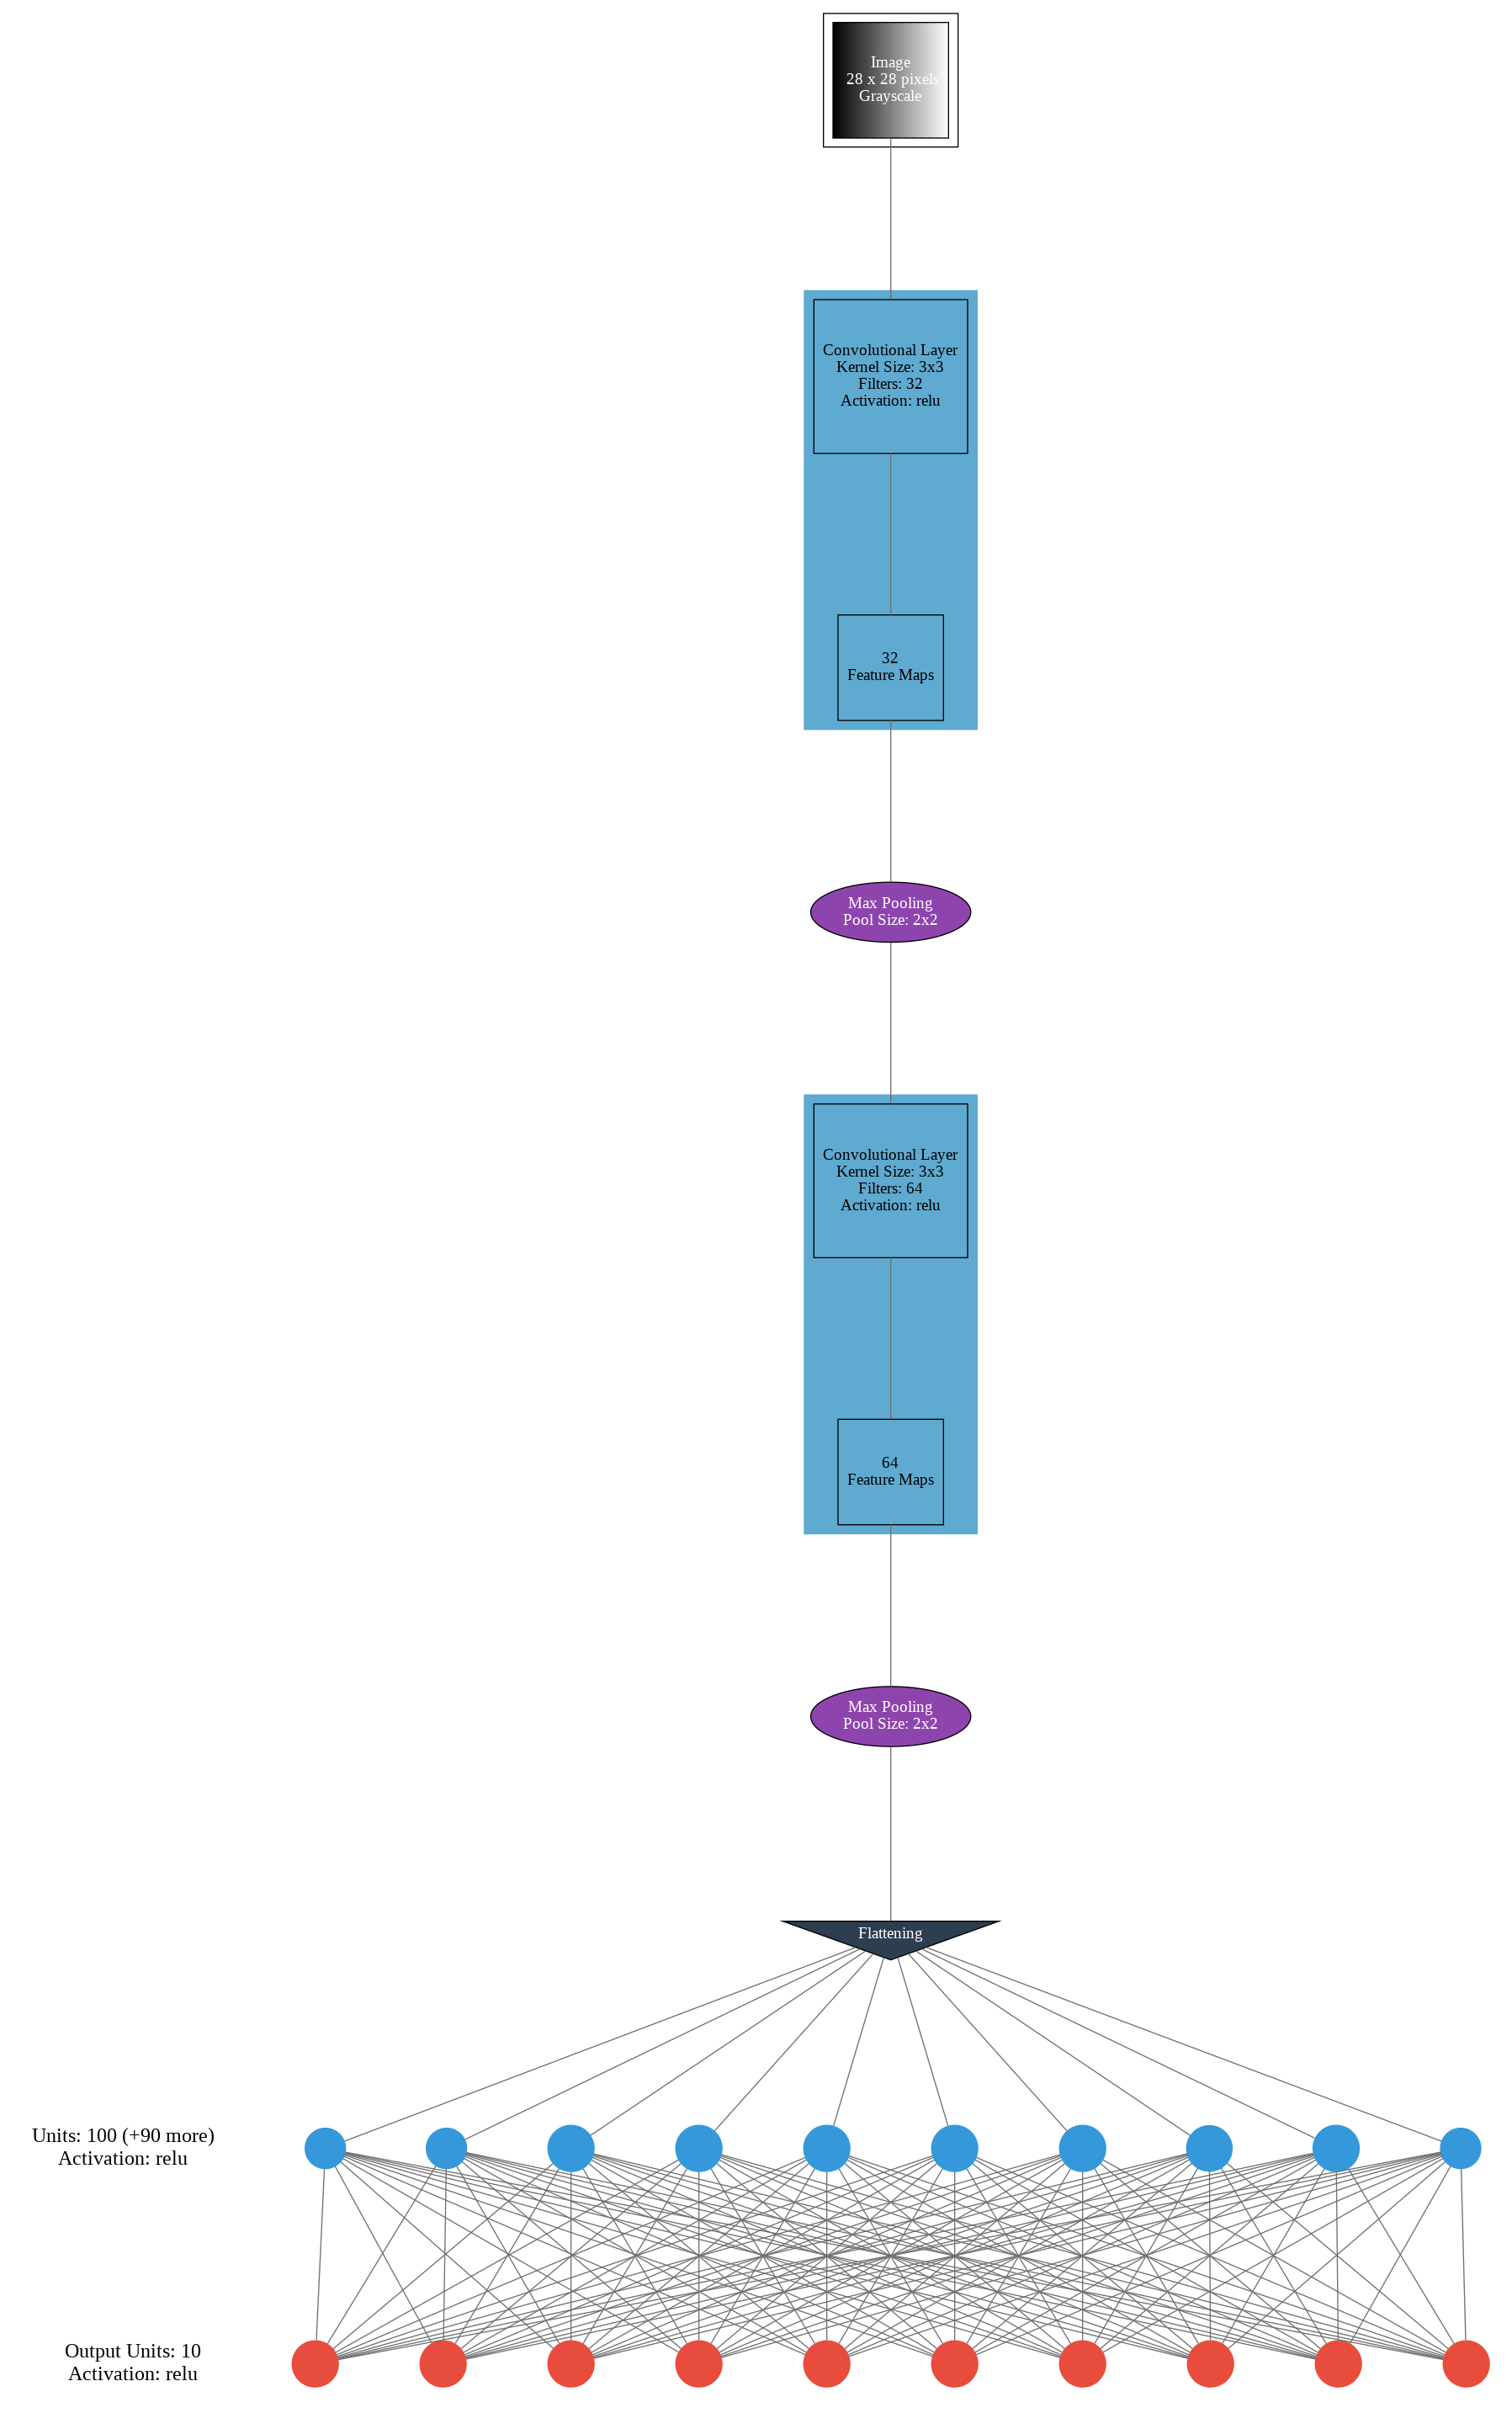

In [ ]:

#Utilizamos Image para visualizar la imagen del modelo que se imprimio con el
#Visualizer
visualizer(model, format='png', view=True)
Image("graph.png")

## TRAINING Y TESTING

In [ ]:
#Se realiza el entrenamiento
hist = model.fit(
    data_train,
    epochs = 10,
    steps_per_epoch = 64
)

Epoch 1/10
64/64 [==============================] - 12s 66ms/step - loss: 1.1241 - accuracy: 0.6538
Epoch 2/10
64/64 [==============================] - 5s 73ms/step - loss: 0.3391 - accuracy: 0.8950
Epoch 3/10
64/64 [==============================] - 5s 74ms/step - loss: 0.2055 - accuracy: 0.9404
Epoch 4/10
64/64 [==============================] - 3s 52ms/step - loss: 0.1680 - accuracy: 0.9497
Epoch 5/10
64/64 [==============================] - 2s 34ms/step - loss: 0.1667 - accuracy: 0.9512
Epoch 6/10
64/64 [==============================] - 2s 35ms/step - loss: 0.1298 - accuracy: 0.9570
Epoch 7/10
64/64 [==============================] - 2s 34ms/step - loss: 0.1311 - accuracy: 0.9595
Epoch 8/10
64/64 [==============================] - 2s 34ms/step - loss: 0.1160 - accuracy: 0.9624
Epoch 9/10
64/64 [==============================] - 2s 34ms/step - loss: 0.1046 - accuracy: 0.9673
Epoch 10/10
64/64 [==============================] - 2s 34ms/step - loss: 0.1004 - accuracy: 0.9688


In [ ]:
model.save('tp_chona.h5')

In [ ]:
#Para testearlo decidimos programar la siguiente función, que toma como inputs
#al modelo de entrenamiento y la foto a testear

def predecir(model, filename):
  img = cv2.imread(filename)
  img.resize(28, 28, 1)
  img = np.expand_dims(img, axis=0)

#Despues de unos reajustes de tamaño se predice la foto con el modelo
  prediction = model.predict(img)
  x = 0
  y = 0
  for i in prediction[0]:
    if i > x:
      x = i
      y += 1
  
#Lo que hace este for es recorrer las distintas probabilidades de la imagen 
#para cada número de la lista de números, y si quedará con el número que
#tenga mayor probabilidad
  return classes[y]

In [ ]:
imgs = files.upload()
img = list(imgs.keys())[0]
print('El numero es: ' + predecir(model, img))

#No hemos llegado a entender por qué siempre responde que el número es incorrecto
#sin importar lo clara que sea la imagen. Nos fijamos si se memorizabas los 
#datos en el training pero no parecía ser eso, y en el for no encontramos falla
#en su lógica

Saving 7.png to 7 (1).png
1/1 [==============================] - 0s 19ms/step
El numero es: 3
